In [4]:
# numpy를 가져오는 것은 기본이다.
import numpy as np  

# os  모듈을 로딩 하고 디렉토리 확인 
import os
print(os.getcwd())



/Users/administrator/AI-python_workspace/book-data/06.딥러닝/img-animal


In [3]:
# 디렉토리 위치 바꾸기
data_dir = os.chdir("/Users/administrator/AI-python_workspace/book-data/06.딥러닝/img-animal")

In [5]:
import glob  # 
from glob import glob

# 파일이름을 리스트 형태로 변환 하는데 사용
data_list = glob('*.jpg')
data_list[1:5]

['cat.1211.jpg', 'dog.775.jpg', 'cat.1577.jpg', 'cat.952.jpg']

In [6]:
len(data_list)

4000

In [7]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
text_to_word_sequence(data_list[0])

['dog', '1753', 'jpg']

In [8]:
label = []
for n, path in enumerate(data_list[:100]):
    token = text_to_word_sequence(data_list[n])
    label.append(token[0])

In [9]:
from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

In [10]:
encoder.inverse_transform(label)

array(['dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat',
       'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat',
       'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat',
       'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog',
       'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat',
       'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat',
       'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat',
       'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog',
       'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog',
       'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog',
       'cat'], dtype='<U3')

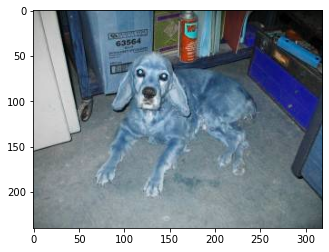

In [11]:
# cv2 모듈을 불러 온다. 
import cv2
from matplotlib import pyplot as plt

# 100번째 있는 사진의 샘플을 본다. 
img = cv2.imread(data_list[100])
plt.imshow(img)
plt.show()

In [12]:
# 이미지를 데이터 셋으로 변환 하고,  이것을 255로 나누어 0 ~ 1로 스케일 한다.
image = cv2.imread(data_list[0])/255
image.shape


(392, 393, 3)

In [13]:
# 데이터 초기화 
data_height = 150
data_width = 150
channel_n = 3

In [14]:
# label 100개를 하였다고 가정하자 
images = np.zeros((100, data_height, data_width, channel_n)) 
for n, path in enumerate(data_list[:100]):
    image = cv2.imread(data_list[n])
    image = cv2.resize(image, (data_height, data_width))
    images[n, :, :, :] =image

image.shape

(150, 150, 3)

In [28]:
image[0]

array([[103, 105, 113],
       [104, 106, 116],
       [106, 110, 121],
       [108, 114, 127],
       [105, 112, 127],
       [112, 116, 135],
       [113, 117, 136],
       [117, 121, 140],
       [123, 127, 146],
       [121, 125, 143],
       [122, 125, 140],
       [125, 129, 144],
       [120, 127, 142],
       [127, 136, 150],
       [129, 134, 152],
       [132, 135, 156],
       [131, 140, 160],
       [136, 151, 170],
       [130, 151, 168],
       [142, 157, 174],
       [147, 162, 178],
       [150, 165, 181],
       [150, 165, 181],
       [144, 159, 175],
       [147, 162, 181],
       [146, 161, 180],
       [147, 162, 181],
       [149, 165, 184],
       [150, 164, 183],
       [147, 157, 175],
       [152, 164, 182],
       [140, 155, 172],
       [142, 158, 175],
       [146, 164, 181],
       [153, 168, 184],
       [147, 163, 179],
       [149, 169, 184],
       [158, 177, 192],
       [157, 166, 183],
       [145, 149, 167],
       [143, 147, 165],
       [134, 138

In [15]:
######################

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2

In [17]:
# image initialization
data_height = 150
data_width = 150
channel_n = 3
batch_size = len(data_list)

In [18]:
# data processing 함수 
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [19]:
def make_file(data_height, data_width, channel_n, batch_size):
    label = []
    images = np.zeros((batch_size, data_height, data_width, channel_n))
    for n, path in enumerate(data_list[:batch_size]):

    # lable 
        token = text_to_word_sequence(data_list[n])
        label.append(token[0])
        
    # image transform
        image = cv2.imread(data_list[n])
        image = cv2.resize(image, (data_height, data_width))/255
        images[n, :, :, :] =image
    
    label = np.array(label)
        
    return (label, images)

In [20]:
# 함수를 이용하여 라벨과 이미지 데이터셋을 가져오기 
(label, images) = make_file(data_height, data_width, channel_n, batch_size)

# 이미지 데이터 구조와 라벨 구조를 보기
print(images.shape, label.shape)

(4000, 150, 150, 3) (4000,)


In [27]:
images[0]

array([[[0.90980392, 0.85490196, 0.98039216],
        [0.88235294, 0.83921569, 0.96470588],
        [0.85098039, 0.82352941, 0.95294118],
        ...,
        [0.26666667, 0.28235294, 0.37647059],
        [0.28235294, 0.29803922, 0.39215686],
        [0.30980392, 0.32156863, 0.41568627]],

       [[0.88235294, 0.84313725, 0.95686275],
        [0.85882353, 0.82745098, 0.94509804],
        [0.83529412, 0.80784314, 0.9372549 ],
        ...,
        [0.27058824, 0.29411765, 0.36862745],
        [0.29411765, 0.31764706, 0.39215686],
        [0.31372549, 0.34117647, 0.41176471]],

       [[0.83529412, 0.81568627, 0.92156863],
        [0.81568627, 0.79607843, 0.91372549],
        [0.79607843, 0.77254902, 0.90980392],
        ...,
        [0.2745098 , 0.30196078, 0.36078431],
        [0.30588235, 0.33333333, 0.39215686],
        [0.31764706, 0.34117647, 0.4       ]],

       ...,

       [[0.53333333, 0.18823529, 0.54117647],
        [0.54901961, 0.20784314, 0.54509804],
        [0.52941176, 0

In [21]:
# data label encoder
from sklearn.preprocessing import LabelEncoder
items = label
encoder = LabelEncoder()
encoder.fit(items)
label = encoder.transform(items)

In [22]:
# data split train set, test set
from sklearn.model_selection import train_test_split
x = images 
y = label

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1004)

# 데이터 셋이  나누어진 것에 대한 구조보기
print(X_train.shape, X_test.shape)

(2800, 150, 150, 3) (1200, 150, 150, 3)


In [23]:
# CNN model network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(data_height, data_width, channel_n)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 147968)            0

2022-01-25 22:57:33.745798: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
                                                       batch_size=128,
                                                       epochs=5)


Epoch 1/5
22/22 [==============================] - 38s 2s/step - loss: 1.0627 - accuracy: 0.5054 - val_loss: 0.6924 - val_accuracy: 0.5208
Epoch 2/5
22/22 [==============================] - 34s 2s/step - loss: 0.6970 - accuracy: 0.5064 - val_loss: 0.6898 - val_accuracy: 0.5067
Epoch 3/5
22/22 [==============================] - 35s 2s/step - loss: 0.6925 - accuracy: 0.5132 - val_loss: 0.6895 - val_accuracy: 0.5508
Epoch 4/5
22/22 [==============================] - 35s 2s/step - loss: 0.6808 - accuracy: 0.5657 - val_loss: 0.6794 - val_accuracy: 0.5625
Epoch 5/5
22/22 [==============================] - 35s 2s/step - loss: 0.6560 - accuracy: 0.6157 - val_loss: 0.7136 - val_accuracy: 0.5650


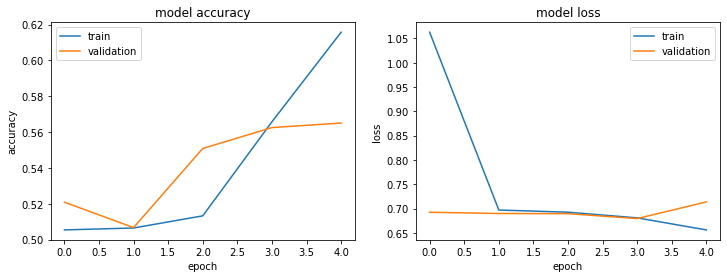

In [26]:
# model chart
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])